In [2]:
from netCDF4 import Dataset,num2date
from datetime import datetime
import numpy as np
from numpy import asarray
from numpy import savetxt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import pandas as pd
#from mpl_toolkits.basemap import Basemap
import re
import matplotlib.patches as Rectangle 
import nctoolkit as nc


Please install CDO version 1.9.3 or above: https://code.mpimet.mpg.de/projects/cdo/ or https://anaconda.org/conda-forge/cdo
Please install CDO version 1.9.3 or above: https://code.mpimet.mpg.de/projects/cdo/ or https://anaconda.org/conda-forge/cdo


In [11]:
# nc1 = Dataset("/media/school/DATA/.nc")
nc1 = Dataset("C:/Users/Harikrishnan R/Desktop/Cyclones/2004/BOB01/bob1.nc")
# df = pd.read_excel('/media/school/DATA/bio.xlsx')
df = pd.read_excel('C:/Users/Harikrishnan R/Desktop/Cyclones/2004/BOB01/track.xlsx')
# nc2 = xr.open_dataset("/media/school/DATA/Fani.nc")
nc2 = xr.open_dataset("C:/Users/Harikrishnan R/Desktop/Cyclones/2004/BOB01/bob1.nc")
prec1 = nc2.GPM_3IMERGDF_06_precipitationCal

In [12]:
lats=df.lat
longs=df.lon
date=df.date
#latitude = re.findall(r"[-+]?\d*\.\d+|\d+", str(lats))
#latitude=latitude*0.1


In [13]:
nc1

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    history: Mon Mar 29 12:19:30 2021: cdo merge bob1may16.nc bob1may17.nc bob1may18.nc bob1may19.nc bob1.nc
Mon Mar  1 19:05:45 2021: /usr/bin/ncatted -O -o accumulate.GPM_3IMERGDF_06_precipitationCal.20040516-20040516.59E_0N_100E_27N.nc -a Units,,d,, accumulate.GPM_3IMERGDF_06_precipitationCal.20040516-20040516.59E_0N_100E_27N.nc
Mon Mar  1 19:05:45 2021: /usr/bin/ncks -O -x -v time_bnds accumulate.GPM_3IMERGDF_06_precipitationCal.20040516-20040516.59E_0N_100E_27N.nc accumulate.GPM_3IMERGDF_06_precipitationCal.20040516-20040516.59E_0N_100E_27N.nc
Mon Mar  1 19:05:45 2021: /usr/bin/ncks -C -D 4 -O -o accumulate.GPM_3IMERGDF_06_precipitationCal.20040516-20040516.59E_0N_100E_27N.nc -x -v time accumulate.GPM_3IMERGDF_06_precipitationCal.20040516-20040516.59E_0N_100E_27N.nc
Mon Mar  1 19:05:44 2021: /usr/bin/ncatted -O -o accum

In [16]:
lati=[]
long=[]
date=[]
for i in range (7,21,4):
    lati.append(df.lat[i]*.1)
    long.append(df.lon[i]*.1)
    date.append(df.date[i])
#     print(lati)


In [17]:
lati,long,date


([18.0, 18.400000000000002, 18.8, 20.900000000000002],
 [91.10000000000001, 88.80000000000001, 90.2, 94.7],
 [2004051612, 2004051712, 2004051812, 2004051912])

In [18]:
lats=lats*0.1
longs=longs*0.1


In [19]:
prec=nc1['GPM_3IMERGDF_06_precipitationCal'][:]
lat = nc1['lat'][:]
lon = nc1['lon'][:]

In [20]:
# ave = nc2.sel(lat=slice(0,85),lon=slice(10,95)).mean(dim=['lat','lon'])
# print(ave)

Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
Passing the minor parameter of set_xticks() position

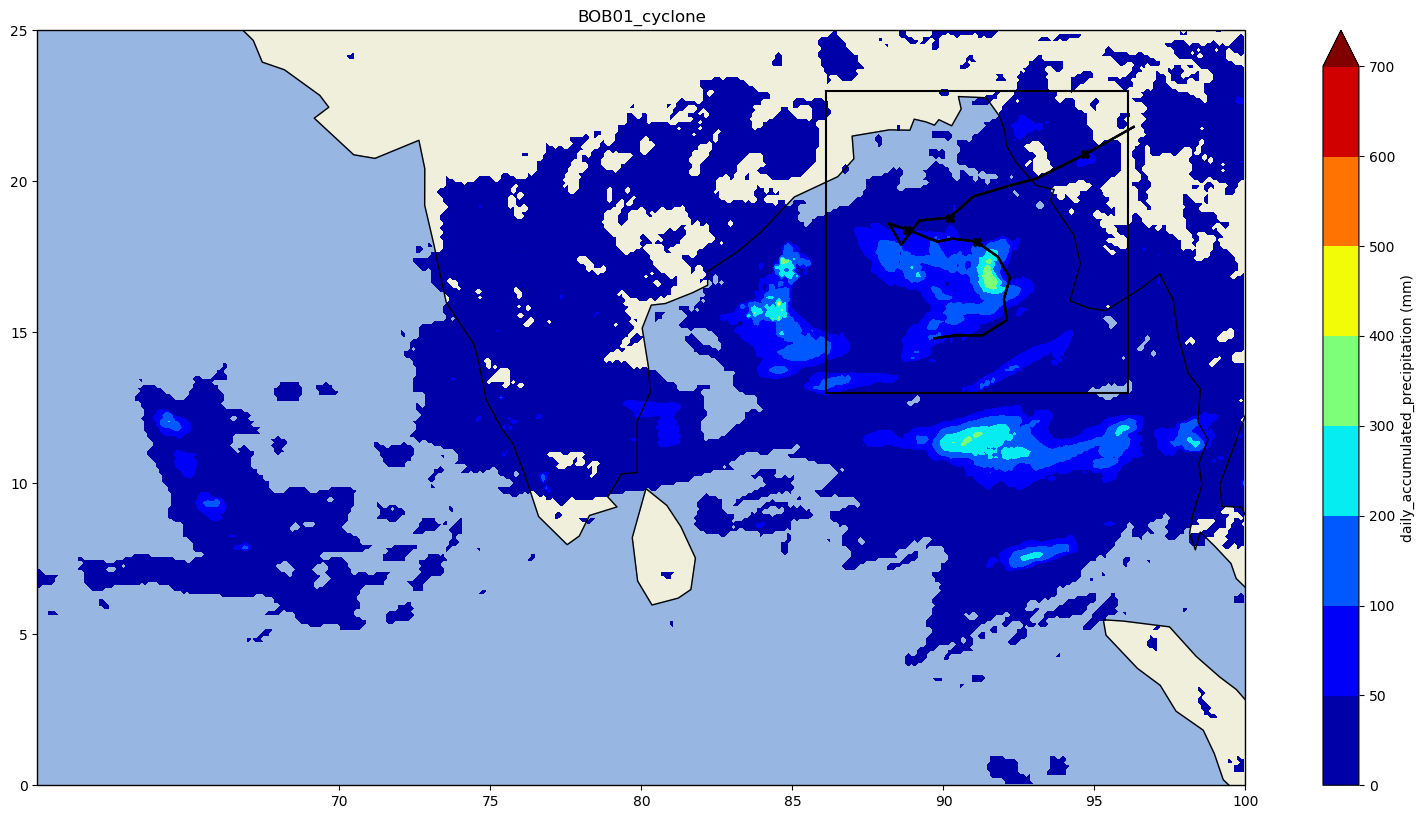

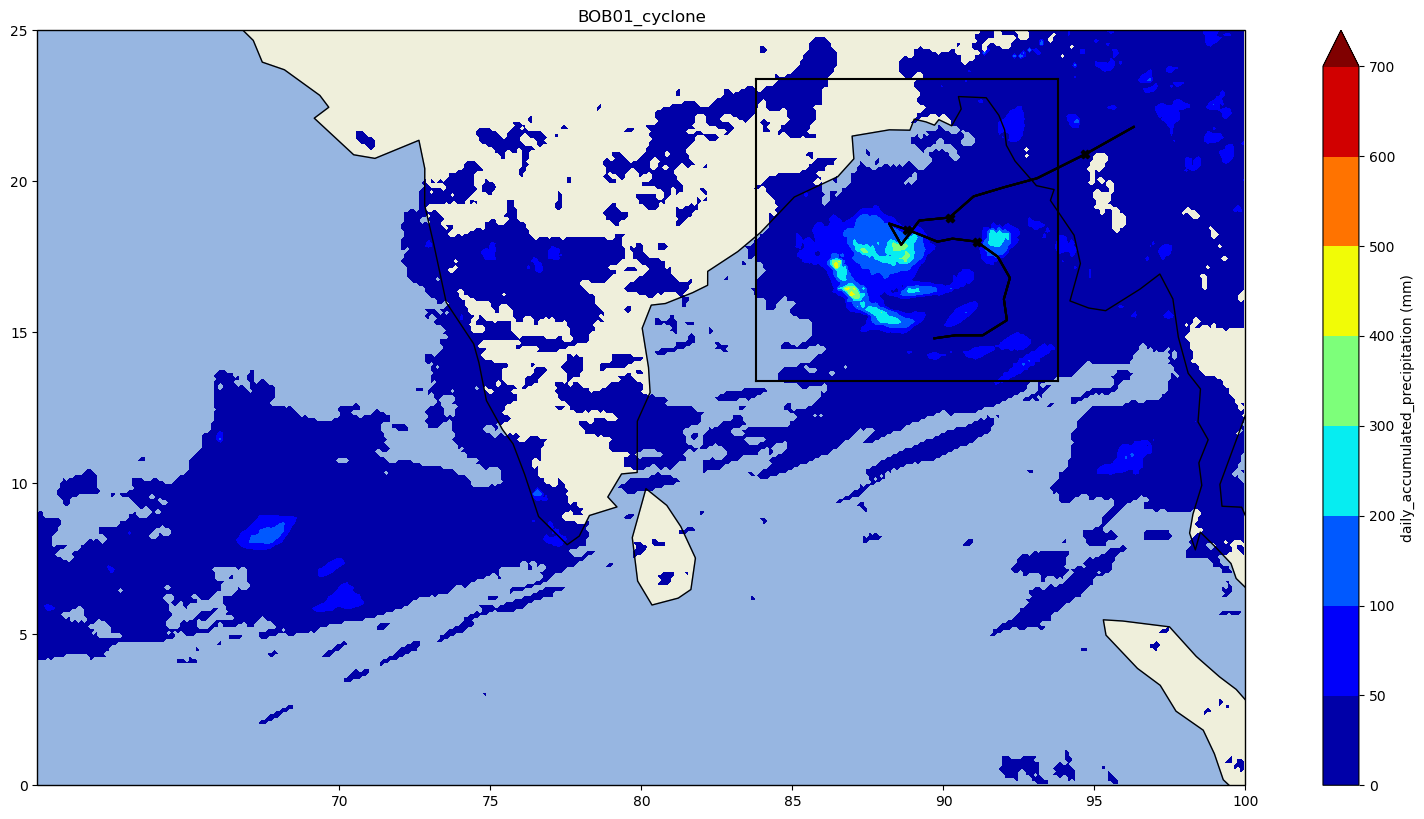

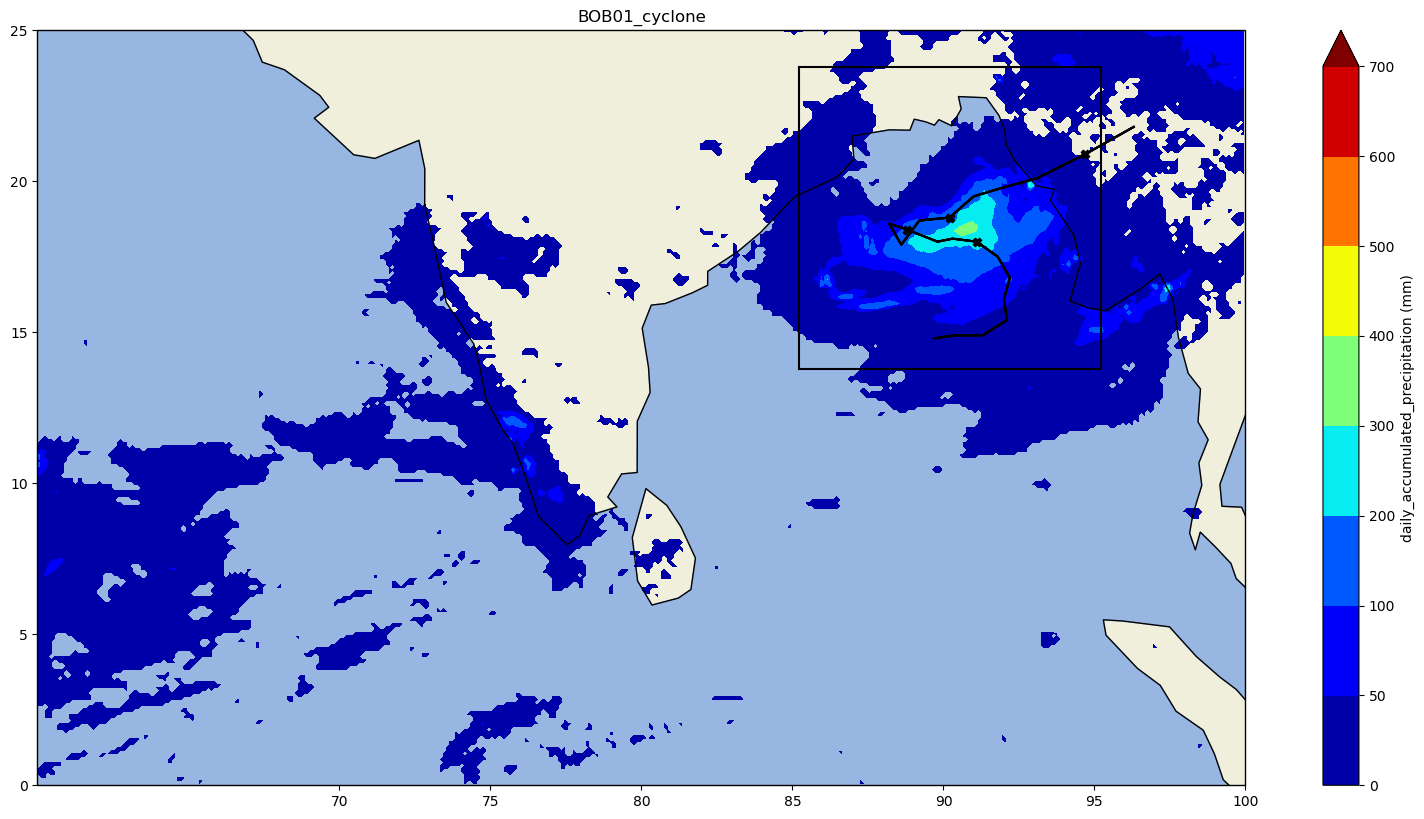

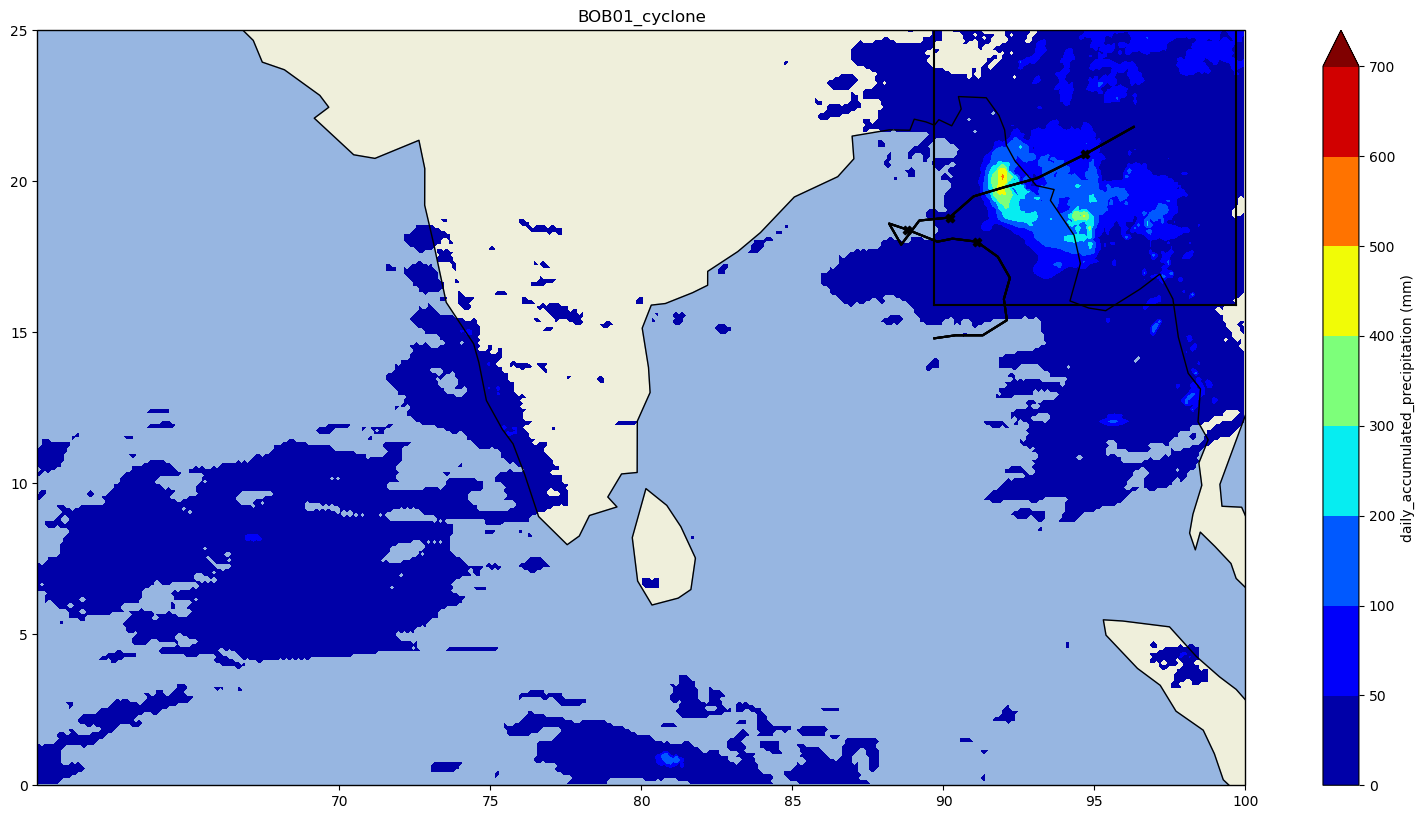

In [21]:
prec[prec<1]=np.nan

var1=[]
var2=[]
var3=[]
for i in range(0,4):
    cmap=plt.cm.jet
    cmap.set_over( color='maroon')
    fig=plt.figure(figsize=(20, 10),dpi=100)
    m6 = plt.axes(projection=ccrs.PlateCarree())
    m6.set_xticks([70,75,80,85,90,95,100], crs=ccrs.PlateCarree())
    m6.set_yticks([ 0,5,10,15,20,25], crs=ccrs.PlateCarree())
    m6.set_extent([60, 100, 0, 25], ccrs.PlateCarree()) 
    m6.add_feature(cfeature.LAND)
    m6.add_feature(cfeature.OCEAN)
    m6.add_feature(cfeature.COASTLINE)
    plt.contourf(lon, lat, prec[i,:,:],cmap=cmap,levels=[0,50,100,200,300,400,500,600,700] ,extend='max',vmax=700)
    plt.colorbar(label="daily_accumulated_precipitation (mm)")
    plt.title('BOB01_cyclone')
    
    for j in range (7,21,4):
        plt.scatter(longs[j],lats[j],color='black',marker='X')
        plt.plot(longs,lats,color='black')
        currentAxis = plt.gca()
    plt.plot([long[i]-5.0,long[i]+5.0],[lati[i]-5.0,lati[i]-5.0],color='black')

    plt.plot([long[i]-5.0,long[i]+5.0],[lati[i]+5.0,lati[i]+5.0],color='black')

    plt.plot([long[i]-5.0,long[i]-5.0],[lati[i]-5.0,lati[i]+5.0],color='black')

    plt.plot([long[i]+5.0,long[i]+5.0],[lati[i]-5.0,lati[i]+5.0],color='black')

    ave=nc2.sel(lat=slice(lati[i]-5.0,lati[i]+5.0),lon=slice(long[i]-5.0,long[i]+5.0))['GPM_3IMERGDF_06_precipitationCal'].mean(dim=['lat','lon'])[i]
    maxi=nc2.sel(lat=slice(lati[i]-5.0,lati[i]+5.0),lon=slice(long[i]-5.0,long[i]+5.0))['GPM_3IMERGDF_06_precipitationCal'].max(dim=['lat','lon'])[i]
    tot=nc2.sel(lat=slice(lati[i]-5.0,lati[i]+5.0),lon=slice(long[i]-5.0,long[i]+5.0))['GPM_3IMERGDF_06_precipitationCal'].sum(dim=['lat','lon'])[i]
    var1.append(float(ave))
    var2.append(float(maxi))
    var3.append(float(tot))
#         ave.shape
#     df.savetext('sheet.xlsx')
    #print(ave,maxi,tot)
    #print(ave)
    plt.savefig('C:/Users/Harikrishnan R/Desktop/Cyclones/2004/Bob01/Bob01_'+ str(i+1) +'.jpg')


In [22]:
var4=pd.DataFrame({'mean':var1,'maximum':var2,'total':var3})
# dsf=pd.DataFrame(var4)
var4.to_excel('C:/Users/Harikrishnan R/Desktop/Cyclones/2004/Bob01/details.xlsx')

In [ ]:
var1


In [ ]:
# ave = nc2.sel(lat=slice(lati[0],lati[1]),lon=slice(long[0],long[1])).mean(dim=['lat','lon'])
# ave.values
data = ave1()
# save to csv file
savetxt('data.csv', data, delimiter=',')

In [ ]:
# long[0],long[1],lati[0],lati[1]

In [ ]:
# for i in range (0,9):
#     plt.plot(nc2.sel(lat=slice(lati[i]-5.0,lati[i]+5.0),lon=slice(long[i]-5.0,long[i]+5.0))['GPM_3IMERGDF_06_precipitationCal'].mean(dim=['lat','lon'])[i])

In [ ]:
ave1=[]
for i in range (0,9):
    ave1=ave[i]

In [ ]:
ave=nc2.sel(lat=slice(lati[i]-5.0,lati[i]+5.0),lon=slice(long[i]-5.0,long[i]+5.0))
['GPM_3IMERGDF_06_precipitationCal'].mean(dim=['lat','lon'])[i]